<a href="https://colab.research.google.com/github/victormurcia/CTS_Test/blob/main/EDA_NCT04177706.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#Load Patient Dataframe
url = 'https://raw.githubusercontent.com/victormurcia/CTS_Test/main/MDClone/NCT04177706.csv'
cohort = pd.read_csv(url)
cohort

,date of birth,gender at birth,opioid_use-condition,mdd-condition,buprenorphine-medication (administered),anti-depressants-medication (administered),csssrs-survey/scale score,bpd-condition,not_pregnant-health factor,delirium-condition,...,glaucoma-condition,blood_pressure-bp (diastolic),blood_pressure-bp (systolic),end-stage renal disease-condition,ketamine_urine-result numeric (original),illegal_drug_use-health factor,myocardial infarction-condition,myocardial ischemia-condition,cows-survey/scale score,madrs-health factor
0,1955.666667,Male,True,True,False,False,0.0,False,False,False,...,True,75.979149,136.022036,False,NaN,False,False,False,0.0,False
1,1950.166667,Male,True,True,False,False,0.0,False,False,False,...,True,70.476583,133.985764,False,NaN,False,False,False,3.0,False
2,1962.166667,censored,True,censored,censored,False,0.0,False,False,False,...,True,70.012222,129.979359,False,NaN,True,False,False,2.0,False
3,1973.166667,Male,True,True,False,False,0.0,False,False,False,...,True,86.998448,139.002124,False,NaN,False,False,False,0.0,False
4,1975.583333,Male,True,True,False,True,1.0,False,False,False,...,True,86.920643,122.640061,False,NaN,False,False,False,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6710,1954.916667,Male,True,True,False,True,4.0,False,False,False,...,False,80.004842,132.978087,False,NaN,False,False,False,0.0,False
6711,1981.916667,Male,True,True,False,True,0.0,False,False,False,...,False,87.998312,126.993090,False,NaN,False,False,False,1.0,False
6712,1985.166667,Male,True,True,False,True,0.0,False,False,False,...,False,89.001540,128.010244,False,NaN,False,False,False,3.0,False
6713,1949.333333,Male,True,True,False,True,0.0,False,False,False,...,False,84.013204,125.019860,True,NaN,False,True,True,0.0,False


In [5]:
cohort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6715 entries, 0 to 6714
Data columns (total 22 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date of birth                               6715 non-null   float64
 1   gender at birth                             6715 non-null   object 
 2   opioid_use-condition                        6715 non-null   bool   
 3   mdd-condition                               6715 non-null   object 
 4   buprenorphine-medication (administered)     6715 non-null   object 
 5   anti-depressants-medication (administered)  6715 non-null   object 
 6   csssrs-survey/scale score                   6715 non-null   float64
 7   bpd-condition                               6715 non-null   object 
 8   not_pregnant-health factor                  6715 non-null   object 
 9   delirium-condition                          6715 non-null   object 
 10  informedcons

In [6]:
def calculate_null_percentage(df):
    total_rows = df.shape[0]
    null_percentages = df.isnull().sum() / total_rows * 100
    return null_percentages

print('Attribute                                       %Null')
print('-----------------------------------------------------')
calculate_null_percentage(cohort)

Attribute                                       %Null
-----------------------------------------------------


date of birth                                   0.000000
gender at birth                                 0.000000
opioid_use-condition                            0.000000
mdd-condition                                   0.000000
buprenorphine-medication (administered)         0.000000
anti-depressants-medication (administered)      0.000000
csssrs-survey/scale score                       0.000000
bpd-condition                                   0.000000
not_pregnant-health factor                      0.000000
delirium-condition                              0.000000
informedconsent-health factor                   0.000000
aneurysm-condition                              0.000000
glaucoma-condition                              0.000000
blood_pressure-bp (diastolic)                   0.178704
blood_pressure-bp (systolic)                    0.178704
end-stage renal disease-condition               0.000000
ketamine_urine-result numeric (original)      100.000000
illegal_drug_use-health factor 

In [7]:
#Convert year to an integer
cohort['date of birth'] = cohort['date of birth'].round().astype(int)
# Get the current year
current_year = datetime.datetime.now().year
cohort['age'] = current_year - cohort['date of birth']
#Remove patients whose age exceeds 65 or is below 18
cohort = cohort[(cohort['age'] < 65) & (cohort['age'] > 18)].reset_index().drop(['index'], axis=1)
cohort

,date of birth,gender at birth,opioid_use-condition,mdd-condition,buprenorphine-medication (administered),anti-depressants-medication (administered),csssrs-survey/scale score,bpd-condition,not_pregnant-health factor,delirium-condition,...,blood_pressure-bp (diastolic),blood_pressure-bp (systolic),end-stage renal disease-condition,ketamine_urine-result numeric (original),illegal_drug_use-health factor,myocardial infarction-condition,myocardial ischemia-condition,cows-survey/scale score,madrs-health factor,age
0,1962,censored,True,censored,censored,False,0.0,False,False,False,...,70.012222,129.979359,False,NaN,True,False,False,2.0,False,61
1,1973,Male,True,True,False,False,0.0,False,False,False,...,86.998448,139.002124,False,NaN,False,False,False,0.0,False,50
2,1976,Male,True,True,False,True,1.0,False,False,False,...,86.920643,122.640061,False,NaN,False,False,False,1.0,False,47
3,1960,Male,True,True,True,True,0.0,False,False,False,...,45.718961,112.006218,False,NaN,False,True,True,3.0,False,63
4,1959,Male,True,True,False,False,0.0,False,False,False,...,85.012585,136.032069,False,NaN,False,False,True,3.0,False,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,1992,Male,True,True,True,True,0.0,False,False,False,...,76.002591,121.017136,False,NaN,False,False,False,2.0,False,31
5264,1988,Male,True,True,True,True,0.0,False,False,False,...,88.993044,134.983010,False,NaN,False,False,False,1.0,False,35
5265,1987,Male,True,True,False,True,0.0,False,False,False,...,55.987341,124.988951,False,NaN,False,False,False,0.0,False,36
5266,1982,Male,True,True,False,True,0.0,False,False,False,...,87.998312,126.993090,False,NaN,False,False,False,1.0,False,41


In [8]:
pd.set_option('display.max_columns', 17)
cohort

,date of birth,gender at birth,opioid_use-condition,mdd-condition,buprenorphine-medication (administered),anti-depressants-medication (administered),csssrs-survey/scale score,bpd-condition,...,end-stage renal disease-condition,ketamine_urine-result numeric (original),illegal_drug_use-health factor,myocardial infarction-condition,myocardial ischemia-condition,cows-survey/scale score,madrs-health factor,age
0,1962,censored,True,censored,censored,False,0.0,False,...,False,NaN,True,False,False,2.0,False,61
1,1973,Male,True,True,False,False,0.0,False,...,False,NaN,False,False,False,0.0,False,50
2,1976,Male,True,True,False,True,1.0,False,...,False,NaN,False,False,False,1.0,False,47
3,1960,Male,True,True,True,True,0.0,False,...,False,NaN,False,True,True,3.0,False,63
4,1959,Male,True,True,False,False,0.0,False,...,False,NaN,False,False,True,3.0,False,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,1992,Male,True,True,True,True,0.0,False,...,False,NaN,False,False,False,2.0,False,31
5264,1988,Male,True,True,True,True,0.0,False,...,False,NaN,False,False,False,1.0,False,35
5265,1987,Male,True,True,False,True,0.0,False,...,False,NaN,False,False,False,0.0,False,36
5266,1982,Male,True,True,False,True,0.0,False,...,False,NaN,False,False,False,1.0,False,41


In [9]:
# Calculate the percentage of non-False values in each column
nonnumeric_columns = cohort.select_dtypes(exclude=['number']).columns
nf = cohort[nonnumeric_columns].drop('gender at birth',axis=1)
percentage_non_false = (nf == True) | (nf == 'True')
percentage_non_false = percentage_non_false.sum() / len(nf) * 100
print('Attribute                                       %True')
print('-----------------------------------------------------')
print(percentage_non_false)

Attribute                                       %True
-----------------------------------------------------
opioid_use-condition                          100.000000
mdd-condition                                  80.694761
buprenorphine-medication (administered)        47.475323
anti-depressants-medication (administered)     66.837509
bpd-condition                                  38.743356
not_pregnant-health factor                      1.708428
delirium-condition                             14.123007
informedconsent-health factor                   0.816249
aneurysm-condition                              1.271830
glaucoma-condition                              9.529233
end-stage renal disease-condition               1.366743
illegal_drug_use-health factor                 10.079727
myocardial infarction-condition                 4.441913
myocardial ischemia-condition                   8.959757
madrs-health factor                             0.037965
dtype: float64


In [10]:
def plot_util(df,cols_to_plot,plot_type,figsize=(12,6)):

  # Determine the number of rows and columns for subplots
  num_columns = len(cols_to_plot)
  if num_columns <= 4:
      nrows = 1
      ncols = num_columns
  else:
      nrows = (num_columns + 2) // 3  # Round up to the nearest integer
      ncols = 4

  # Create a grid of plots using Matplotlib's subplots
  fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
  # Flatten the axes array
  axes = axes.ravel()

  # Create a color palette
  colors = sns.color_palette("Set2", n_colors=num_columns)

  # Iterate over numeric columns and create histograms
  for i, column in enumerate(cols_to_plot):
      ax = axes[i]

      #Select plot type:
      if plot_type == 'hist':
        # Plot histogram for the current column with a different color
        sns.histplot(data=df, x=column, kde=True, color=colors[i], ax=ax)
      elif plot_type == 'count':
        # Create count plot for the current column
        sns.countplot(data=df, x=column, color=colors[i], ax=ax)
      
      ax.set_title(column)
      ax.set_ylabel("Counts")

  # Remove any unused subplots
  if num_columns < nrows * ncols:
    for j in range(num_columns, nrows * ncols):
        fig.delaxes(axes[j])

  plt.tight_layout()
  plt.show()
  return -1

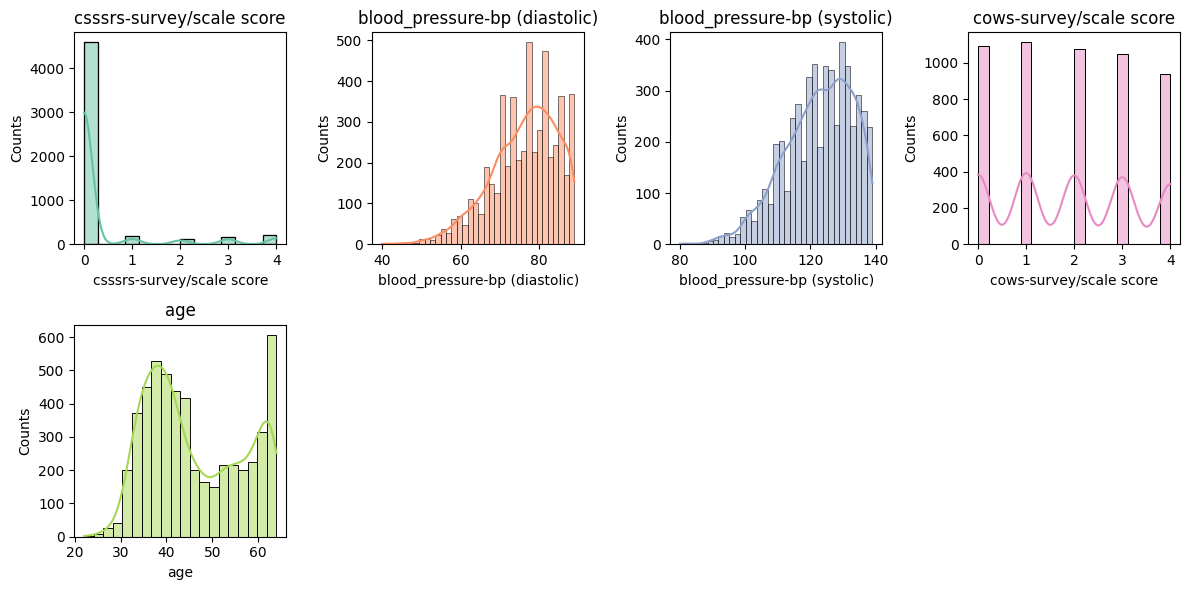

-1

In [11]:
numeric_cols = ['csssrs-survey/scale score','blood_pressure-bp (diastolic)', 'blood_pressure-bp (systolic)','cows-survey/scale score','age']
plot_util(cohort,numeric_cols,'hist')

In [12]:
# Calculate descriptive statistics
cols_to_plot = numeric_cols
stats = cohort[cols_to_plot].describe()
stats

,csssrs-survey/scale score,blood_pressure-bp (diastolic),blood_pressure-bp (systolic),cows-survey/scale score,age
count,5268.000000,5257.000000,5257.000000,5268.000000,5268.000000
mean,0.337320,76.243273,122.606510,1.930524,46.016135
std,0.969399,8.418853,10.380608,1.395739,10.462675
min,0.000000,39.952985,80.134136,0.000000,22.000000
25%,0.000000,70.989920,115.987244,1.000000,37.000000
50%,0.000000,77.017757,123.984633,2.000000,43.000000
75%,0.000000,82.990466,130.987199,3.000000,56.000000
max,4.000000,89.021637,139.032812,4.000000,64.000000


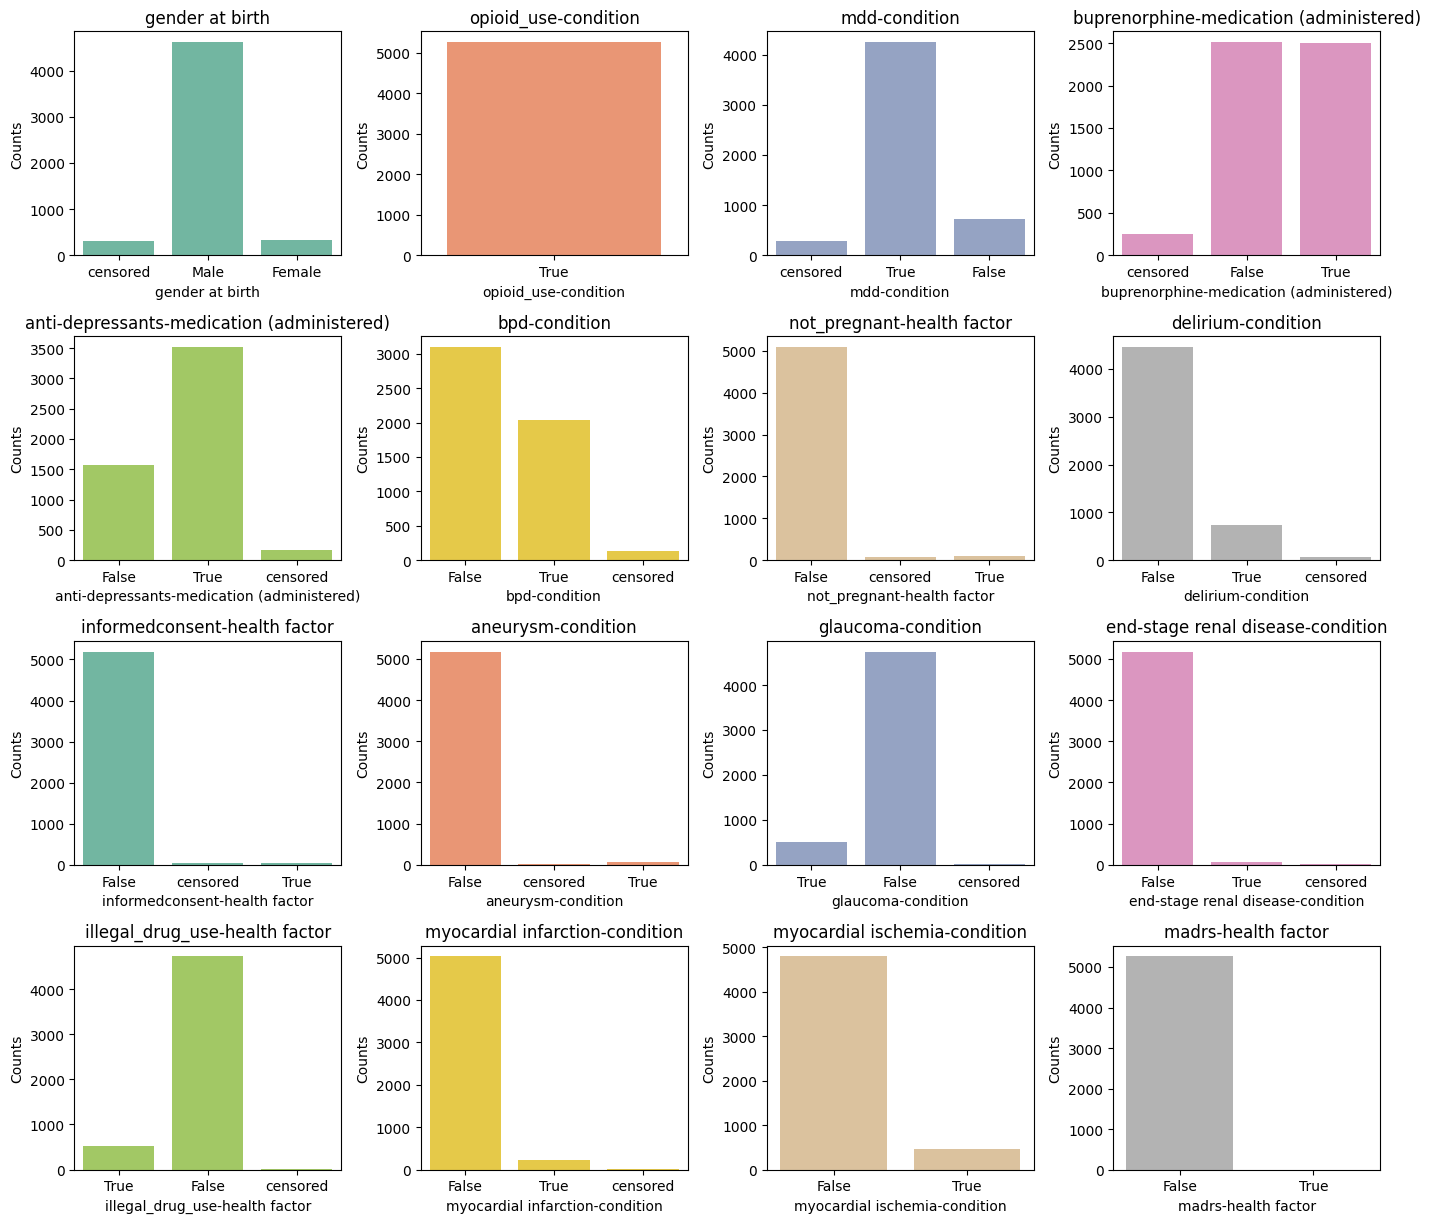

-1

In [13]:
#nonnumeric_cols = [x for x in cohort.columns if x not in numeric_cols]
nonnumeric_columns = cohort.select_dtypes(exclude=['number']).columns
plot_util(cohort,nonnumeric_columns,'count',figsize=(14,18))

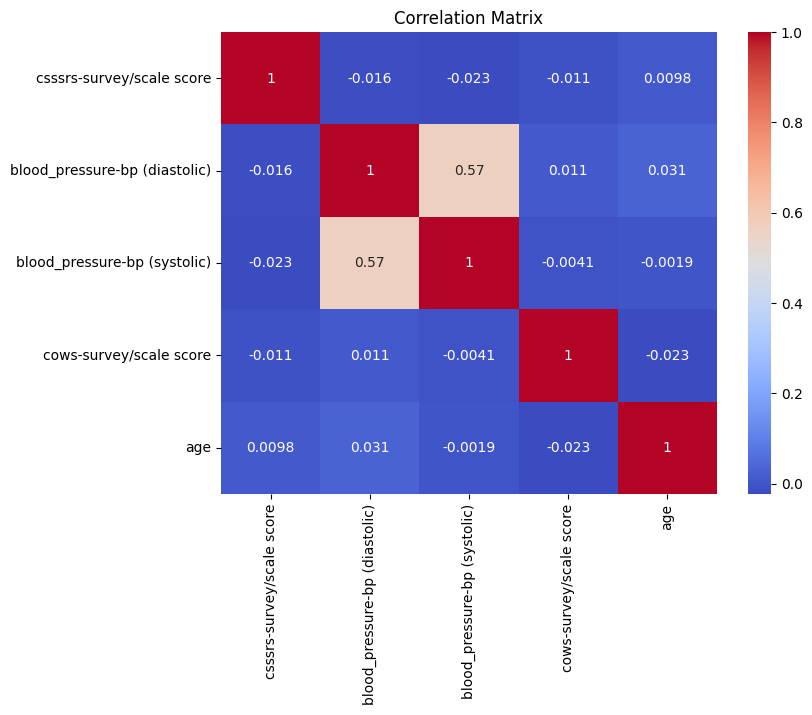

In [14]:
# Calculate the correlation matrix
corr_matrix = cohort[numeric_cols].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()